In [17]:
# Import Modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Data
raw_Data= pd.read_excel('BMED_data.xlsx')

# Data Grouping
group_checker = list(raw_Data[['T','V','E','Ci']].iloc[0])
group_index = []
for i in range(len(raw_Data)):
    if not group_checker == list(raw_Data[['T','V','E','Ci']].iloc[i]):
        group_index.append(i)
        group_checker = list(raw_Data[['T','V','E','Ci']].iloc[i])

# MB data
MB_Data = raw_Data[['T','V','E','Ci','t','CF','CA']]

In [36]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,4),
            nn.ReLU(),
            nn.Linear(4,2),
            nn.ReLU(),
            nn.Linear(2,1),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0 = self.hidden(x).chunk(5, dim=1)

        k = a0[0]**2


        return C0*torch.exp(-k*t)
    

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CF = CustomModel_CF()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CF.parameters(), lr = 0.0001)

    # Learning Loop
    num_epochs = 20000
    
    for epoch in range(num_epochs):
        # forward_propagation
        y_pred = model_CF(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CF(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))

ValueError: not enough values to unpack (expected 2, got 1)

Epoch [1000/20000], Loss: 0.390161
Epoch [2000/20000], Loss: 0.244061
Epoch [3000/20000], Loss: 0.115393
Epoch [4000/20000], Loss: 0.076019
Epoch [5000/20000], Loss: 0.061096
Epoch [6000/20000], Loss: 0.049496
Epoch [7000/20000], Loss: 0.045843
Epoch [8000/20000], Loss: 0.045259
Epoch [9000/20000], Loss: 0.045066
Epoch [10000/20000], Loss: 0.044886
Epoch [11000/20000], Loss: 0.044671
Epoch [12000/20000], Loss: 0.044434
Epoch [13000/20000], Loss: 0.044201
Epoch [14000/20000], Loss: 0.043991
Epoch [15000/20000], Loss: 0.043579
Epoch [16000/20000], Loss: 0.042786
Epoch [17000/20000], Loss: 0.042618
Epoch [18000/20000], Loss: 0.042544
Epoch [19000/20000], Loss: 0.042508
Epoch [20000/20000], Loss: 0.042490


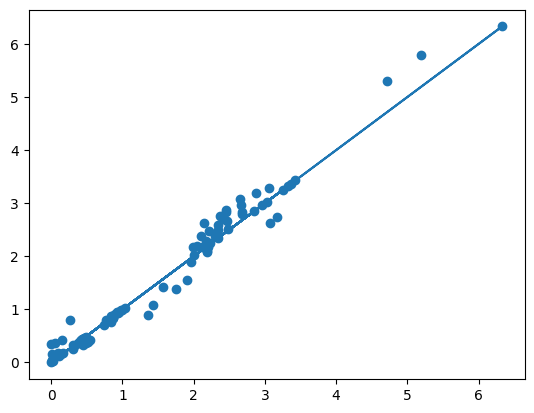

In [31]:
model_CF = CustomModel_CF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CF.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 20000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CF(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')



y_pred2 = model_CF(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [32]:
torch.save(model_CF.state_dict(), 'model_CF.pth')

In [50]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CA']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CA(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0= self.hidden(x).chunk(5, dim=1)

        k = a0[0]**2


        return C0*(1-torch.exp(-k*t))

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CA = CustomModel_CA()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

    # Learning Loop
    num_epochs = 20000
    
    for epoch in range(num_epochs):
        # forward_propagation
        y_pred = model_CA(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CA(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))



        

iter : 1, epoch: 0, loss: 0.8307843208312988
iter : 1, epoch: 2000, loss: 0.009871403686702251
iter : 1, epoch: 4000, loss: 0.008473175577819347
iter : 1, epoch: 6000, loss: 0.007608722895383835
iter : 1, epoch: 8000, loss: 0.007390039507299662
iter : 1, epoch: 10000, loss: 0.006743201520293951
iter : 1, epoch: 12000, loss: 0.00620748195797205
iter : 1, epoch: 14000, loss: 0.00616894057020545
iter : 1, epoch: 16000, loss: 0.00616152910515666
iter : 1, epoch: 18000, loss: 0.006158638745546341
iter : 2, epoch: 0, loss: 0.18863070011138916
iter : 2, epoch: 2000, loss: 0.016392791643738747
iter : 2, epoch: 4000, loss: 0.012620198540389538
iter : 2, epoch: 6000, loss: 0.007004902698099613
iter : 2, epoch: 8000, loss: 0.0051668076775968075
iter : 2, epoch: 10000, loss: 0.004708188120275736
iter : 2, epoch: 12000, loss: 0.004136106465011835
iter : 2, epoch: 14000, loss: 0.00327246799133718
iter : 2, epoch: 16000, loss: 0.0029416566248983145
iter : 2, epoch: 18000, loss: 0.0028890736866742373


KeyboardInterrupt: 

Epoch [10000/100000], Loss: 0.011676
Epoch [20000/100000], Loss: 0.009410
Epoch [30000/100000], Loss: 0.009410
Epoch [40000/100000], Loss: 0.009412
Epoch [50000/100000], Loss: 0.009410
Epoch [60000/100000], Loss: 0.009410
Epoch [70000/100000], Loss: 0.009411
Epoch [80000/100000], Loss: 0.009410
Epoch [90000/100000], Loss: 0.009410
Epoch [100000/100000], Loss: 0.009410


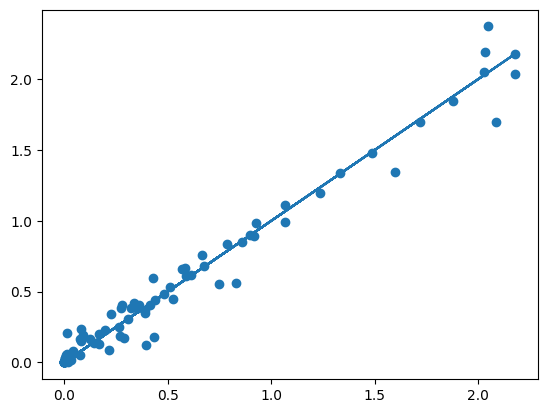

In [51]:

# NN model initialization
model_CA = CustomModel_CA()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 100000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CA(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

    y_pred2 = model_CA(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [52]:
torch.save(model_CA.state_dict(), 'model_CA.pth')